# Data Understanding Profiling

## Importing libraries

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Definition of some functions that will be used later.

In [2]:
def remove_outliers_boxplot(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1

    median = feature[np.logical_and((feature >= Q1 - 1.5 * IQR), (feature <= Q3 + 1.5 * IQR))].median()

    feature[(feature < Q1 - 1.5 * IQR)] = median
    feature[(feature > Q3 + 1.5 * IQR)] = median

    pd.DataFrame(feature).boxplot()
    plt.show()
    
def remove_outliers(feature, q1, q2):
    Q1 = feature.quantile(q1)
    Q3 = feature.quantile(q2)

    median = feature[(log_feature >= Q1) & (feature <= Q3)].median()

    feature[log_feature < Q1] = median
    feature[log_feature > Q3] = median

    pd.DataFrame(feature).boxplot()
    plt.show()

## Loading dataset

In [3]:
users = pd.read_csv("../dataset/user_profiles.csv", index_col = 0)

In [4]:
users.shape

(11508, 19)

In [5]:
users.head(1)

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,retweet_count_entropy
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.0,0.272727,0.098485,0.0,0.0,-0.0,0.037879,0.190903,0.232481,0.037879,0.190903,0.232481


In [6]:
users.info

<bound method DataFrame.info of                           name lang  bot           created_at  statuses_count  \
2353593986     Lamonica Raborn   en    1  2019-02-22 18:00:42              76   
2358850842       Lourie Botton   en    0  2019-02-26 03:02:32              54   
137959629     Dadan Syarifudin   en    1  2015-04-30 07:09:56              53   
466124818       Carletto Focia   it    1  2017-01-18 02:49:18              50   
2571493866           MBK Ebook   en    0  2019-06-18 19:30:21            7085   
...                        ...  ...  ...                  ...             ...   
2911861962  Madrid Lae Maika .   en    0  2019-11-29 13:16:02            1126   
1378532629           Clau Sato   en    0  2018-04-27 03:01:58            3024   
126984069   ALMA LETICIA NUÑO    es    0  2015-03-29 17:01:24               6   
2383025796     Minnie Guadagno   en    1  2019-03-13 02:44:13              42   
933183398            Corvanna    en    0  2017-11-09 23:24:16            5279

## Analysis of each feature
Since now on there will be an analysis made for each feature present in the dataset.

### avg_length

In [7]:
users.avg_length.value_counts()

60.000000    13
57.000000     9
50.000000     9
64.000000     8
71.000000     8
             ..
67.948148     1
70.032680     1
62.942529     1
99.298701     1
52.068064     1
Name: avg_length, Length: 10794, dtype: int64

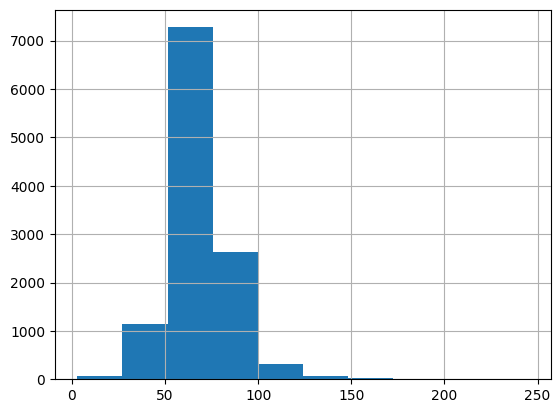

In [8]:
users.avg_length.hist()
plt.show()

In [9]:
users.avg_length.describe()

count    11508.000000
mean        68.140132
std         16.206471
min          3.000000
25%         59.398274
50%         65.527658
75%         77.422770
max        245.000000
Name: avg_length, dtype: float64

In [10]:
users.avg_length.median()

65.52765789965359

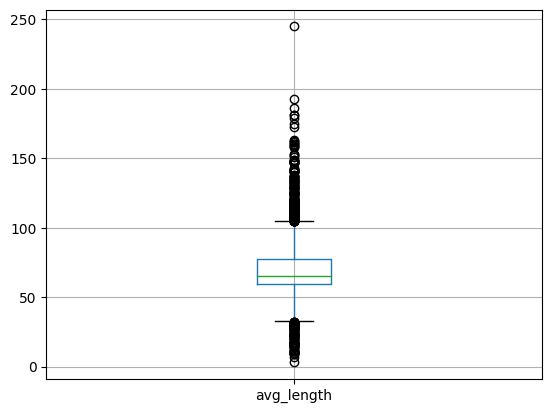

In [11]:
pd.DataFrame(users.avg_length).boxplot()
plt.show()

/var/folders/h6/9j84q4q56zd3nyy8fl00jw0w0000gn/T/ipykernel_16172/1062178392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[(feature < Q1 - 1.5 * IQR)] = median
/var/folders/h6/9j84q4q56zd3nyy8fl00jw0w0000gn/T/ipykernel_16172/1062178392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[(feature > Q3 + 1.5 * IQR)] = median


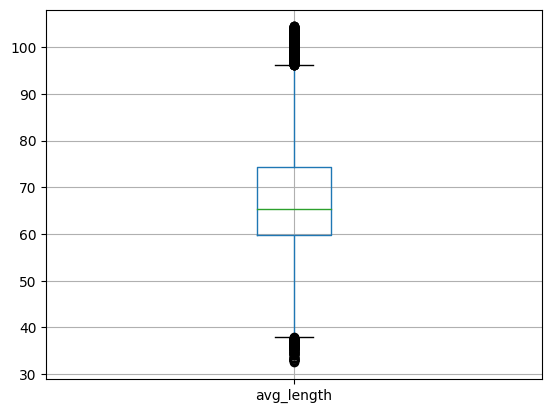

In [12]:
remove_outliers_boxplot(users.avg_length)

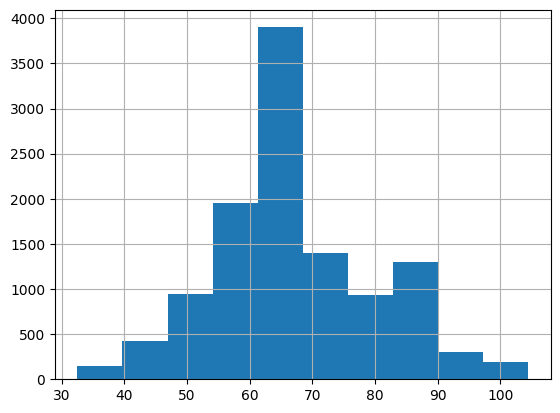

In [13]:
users.avg_length.hist()
plt.show()

### avg_special_chars

In [14]:
users.avg_special_chars.value_counts()

13.000000    34
14.000000    30
15.000000    23
12.000000    19
14.666667    19
             ..
18.503876     1
12.524872     1
16.116667     1
17.209358     1
11.291587     1
Name: avg_special_chars, Length: 9943, dtype: int64

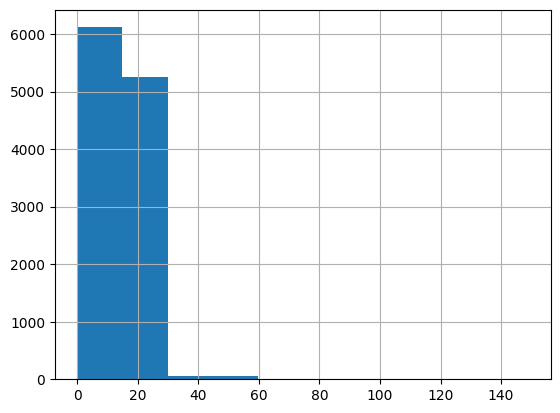

In [15]:
users.avg_special_chars.hist()
plt.show()

In [16]:
users.avg_special_chars.describe() 

count    11508.000000
mean        15.481021
std          5.457811
min          0.000000
25%         13.181641
50%         14.694363
75%         17.228965
max        149.000000
Name: avg_special_chars, dtype: float64

In [17]:
users.avg_special_chars.median()

14.69436341242059

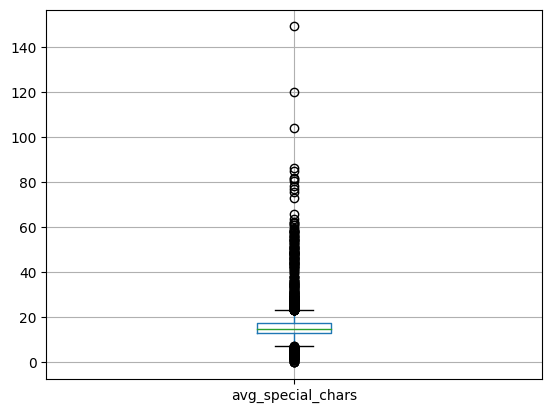

In [18]:
pd.DataFrame(users.avg_special_chars).boxplot()
plt.show()

<AxesSubplot: >

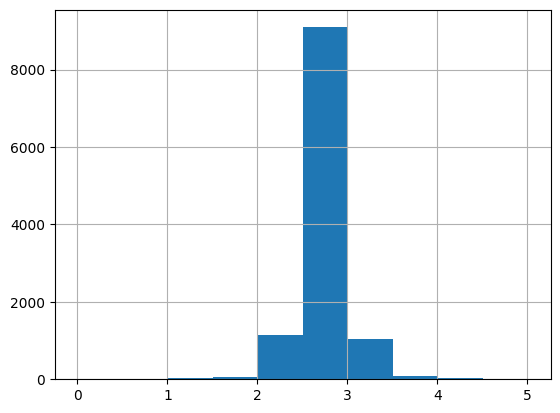

In [19]:
log_feature = pd.Series(np.log(users.avg_special_chars + 1))
log_feature.hist()

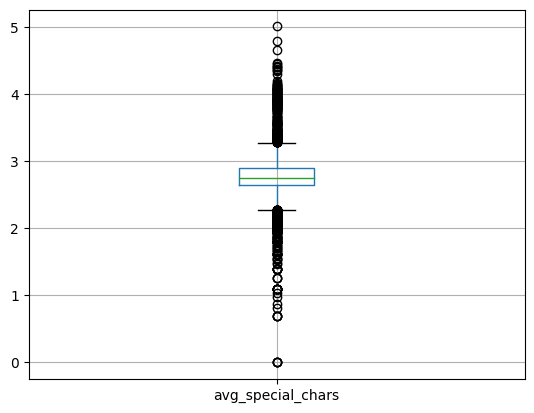

In [20]:
pd.DataFrame(log_feature).boxplot()
plt.show()

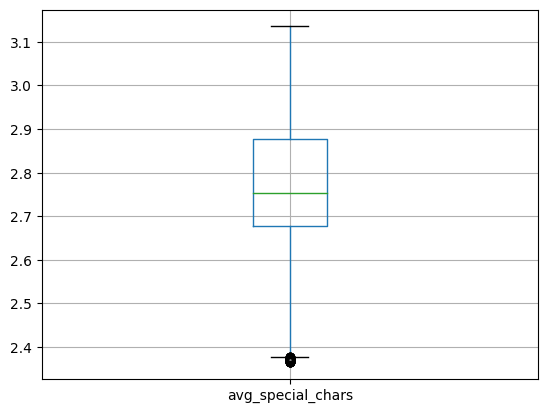

In [21]:
remove_outliers(log_feature, 0.05, 0.95)

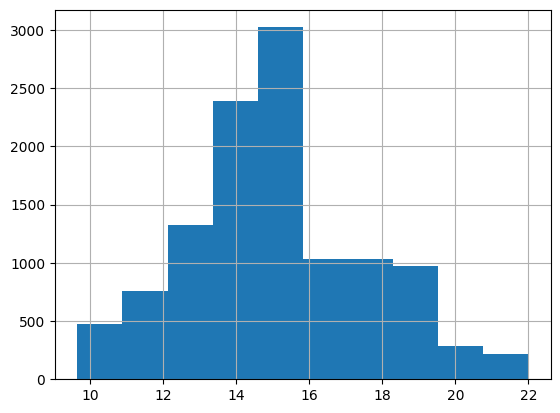

In [22]:
users.avg_special_chars = pd.Series(np.exp(log_feature) - 1)
users.avg_special_chars.hist()
plt.show()

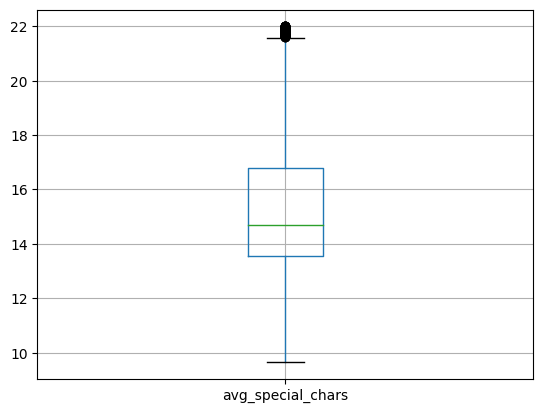

In [23]:
pd.DataFrame(users.avg_special_chars).boxplot()
plt.show()

### urls_ratio

In [24]:
users.urls_ratio.value_counts()

0.000000    5104
1.000000      66
0.050000      31
0.040000      29
0.047619      29
            ... 
0.151876       1
0.006751       1
0.724675       1
0.020518       1
0.011707       1
Name: urls_ratio, Length: 5029, dtype: int64

In [25]:
users.urls_ratio.describe()

count    11508.000000
mean         0.085288
std          0.178620
min          0.000000
25%          0.000000
50%          0.016129
75%          0.070043
max          2.000000
Name: urls_ratio, dtype: float64

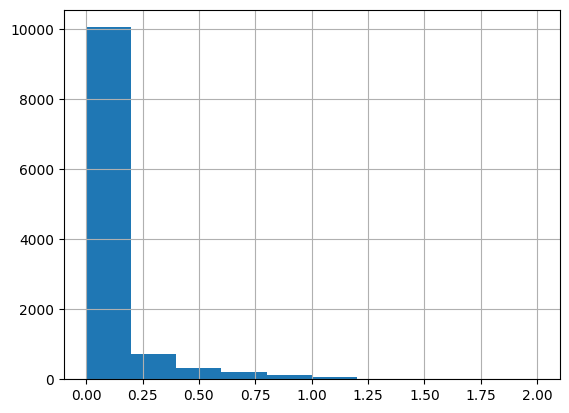

In [26]:
users.urls_ratio.hist()
plt.show()

In [27]:
users.urls_ratio.median()

0.0161290322580645

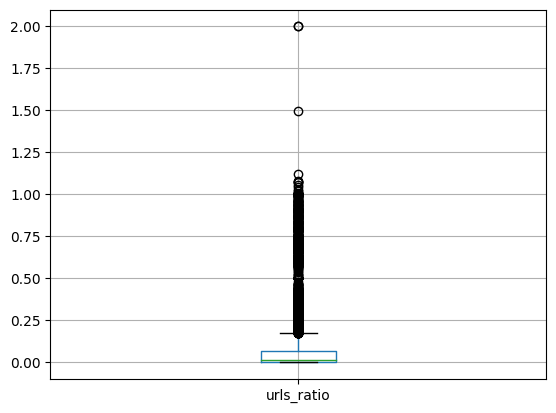

In [28]:
pd.DataFrame(users.urls_ratio).boxplot()
plt.show()

<AxesSubplot: >

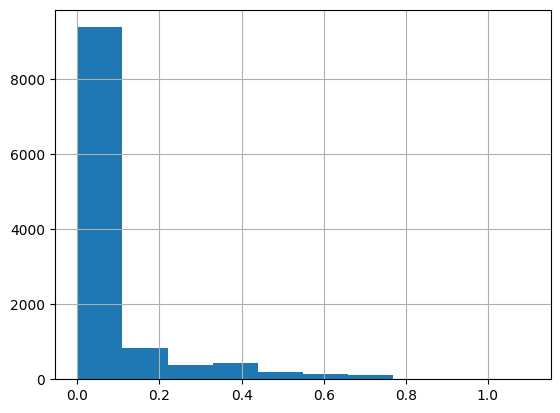

In [29]:
log_feature = pd.Series(np.log(users.urls_ratio + 1))
log_feature.hist()

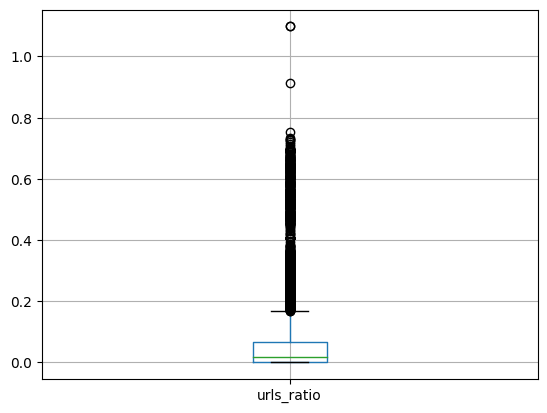

In [30]:
pd.DataFrame(log_feature).boxplot()
plt.show()

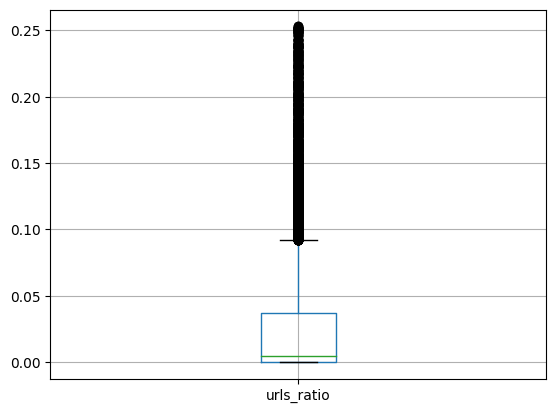

In [31]:
remove_outliers(log_feature, 0.0, 0.90)

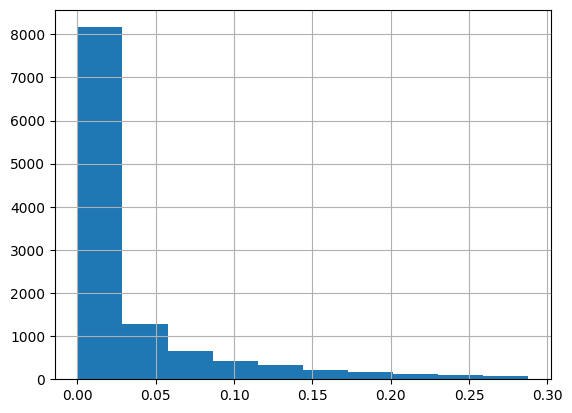

In [32]:
users.urls_ratio = pd.Series(np.exp(log_feature) - 1)
users.urls_ratio.hist()
plt.show()

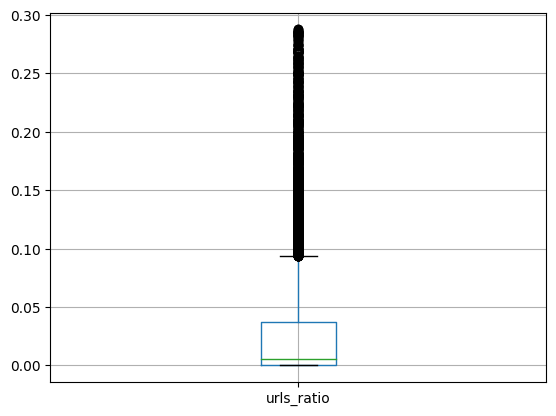

In [33]:
pd.DataFrame(users.urls_ratio).boxplot()
plt.show()

### mentions_ratio

In [34]:
users.mentions_ratio.value_counts()

0.000000    2093
0.333333     110
1.000000      49
0.285714      34
0.300000      32
            ... 
0.401198       1
1.076923       1
0.378151       1
0.001741       1
0.785189       1
Name: mentions_ratio, Length: 5968, dtype: int64

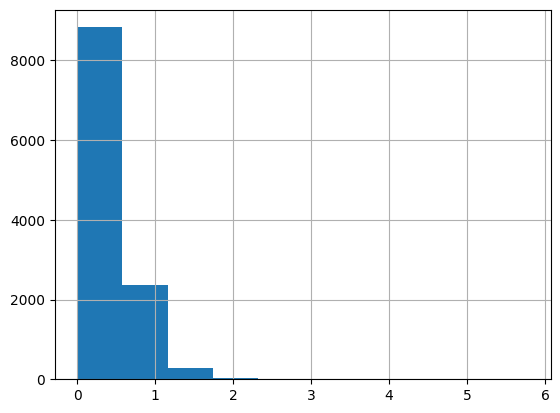

In [35]:
users.mentions_ratio.hist()
plt.show()

In [36]:
users.mentions_ratio.describe()

count    11508.000000
mean         0.353257
std          0.361939
min          0.000000
25%          0.010260
50%          0.304348
75%          0.504230
max          5.785124
Name: mentions_ratio, dtype: float64

In [37]:
users.mentions_ratio.median()

0.3043478260869565

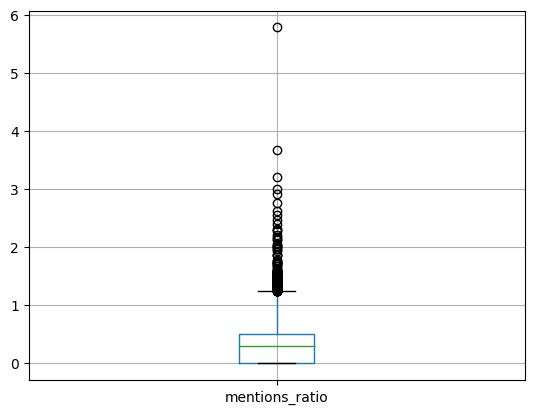

In [38]:
pd.DataFrame(users.mentions_ratio).boxplot()
plt.show()

<AxesSubplot: >

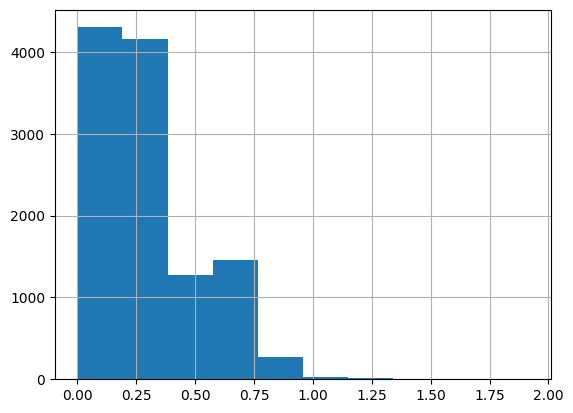

In [39]:
log_feature = pd.Series(np.log(users.mentions_ratio + 1))
log_feature.hist()

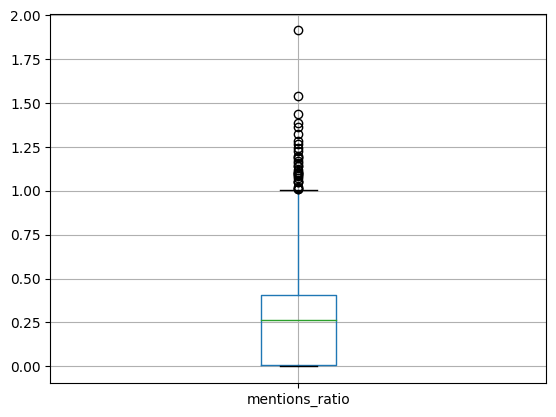

In [40]:
pd.DataFrame(log_feature).boxplot()
plt.show()

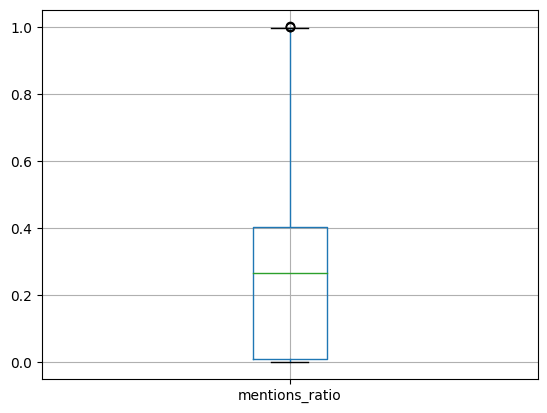

In [41]:
remove_outliers_boxplot(log_feature)

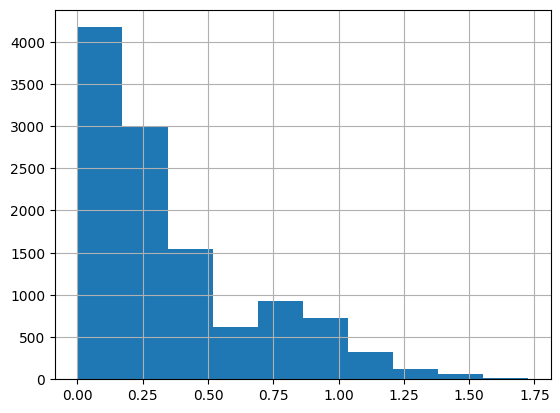

In [42]:
users.mentions_ratio = pd.Series(np.exp(log_feature) - 1)
users.mentions_ratio.hist()
plt.show()

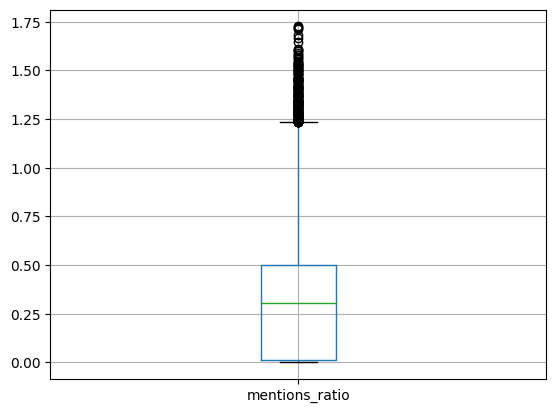

In [43]:
pd.DataFrame(users.mentions_ratio).boxplot()
plt.show()

### hashtags_ratio

In [44]:
users.hashtags_ratio.value_counts()

0.000000    1054
0.125000      63
0.090909      57
0.076923      56
0.200000      54
            ... 
0.027190       1
0.070455       1
0.244161       1
0.054230       1
0.041111       1
Name: hashtags_ratio, Length: 5562, dtype: int64

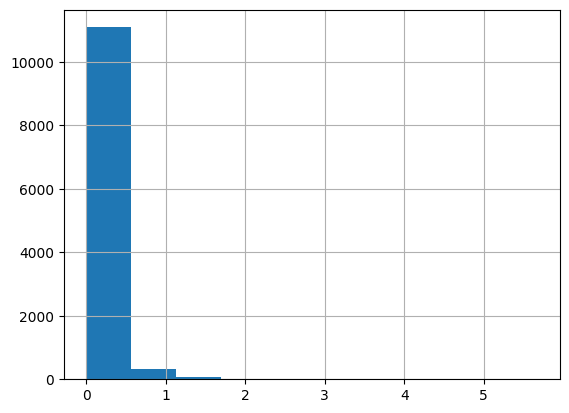

In [45]:
users.hashtags_ratio.hist()
plt.show()

In [46]:
users.hashtags_ratio.describe()

count    11508.000000
mean         0.140665
std          0.212671
min          0.000000
25%          0.045455
50%          0.076923
75%          0.153658
max          5.669974
Name: hashtags_ratio, dtype: float64

In [47]:
users.hashtags_ratio.median()

0.0769230769230769

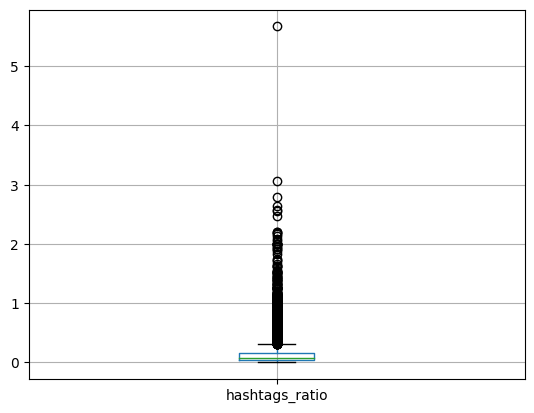

In [48]:
pd.DataFrame(users.hashtags_ratio).boxplot()
plt.show()

<AxesSubplot: >

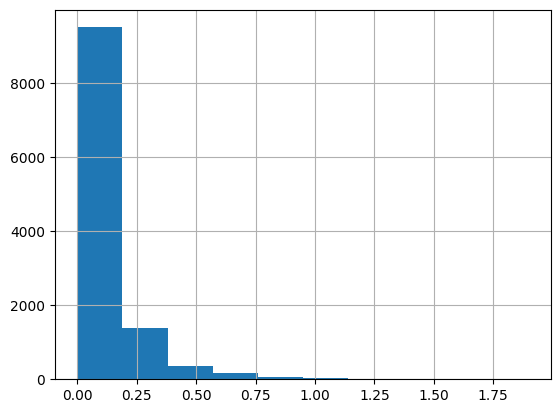

In [49]:
log_feature = pd.Series(np.log(users.hashtags_ratio + 1))
log_feature.hist()

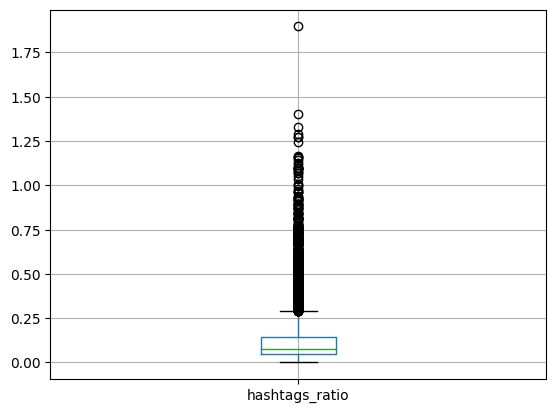

In [50]:
pd.DataFrame(log_feature).boxplot()
plt.show()

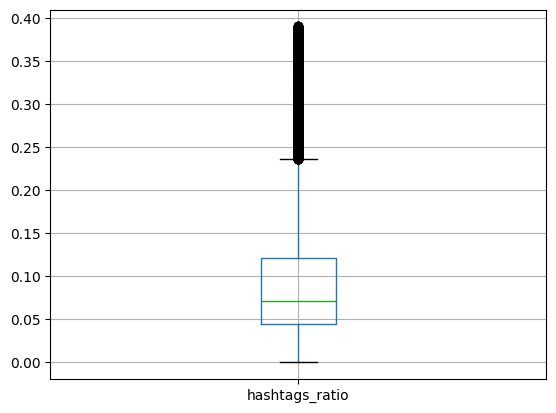

In [51]:
remove_outliers(log_feature, 0.0, 0.95)

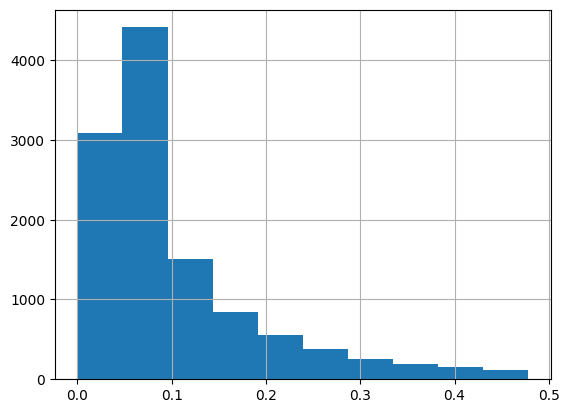

In [52]:
users.hashtags_ratio = pd.Series(np.exp(log_feature) - 1)
users.hashtags_ratio.hist()
plt.show()

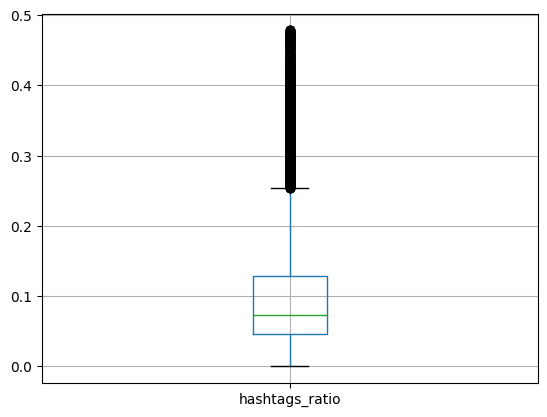

In [53]:
pd.DataFrame(users.hashtags_ratio).boxplot()
plt.show()

### reply_count_mean

In [54]:
users.reply_count_mean.value_counts()

0.000000    9590
0.047619      51
0.045455      42
0.038462      41
0.050000      40
            ... 
0.051948       1
0.059152       1
0.207143       1
0.592834       1
0.067356       1
Name: reply_count_mean, Length: 624, dtype: int64

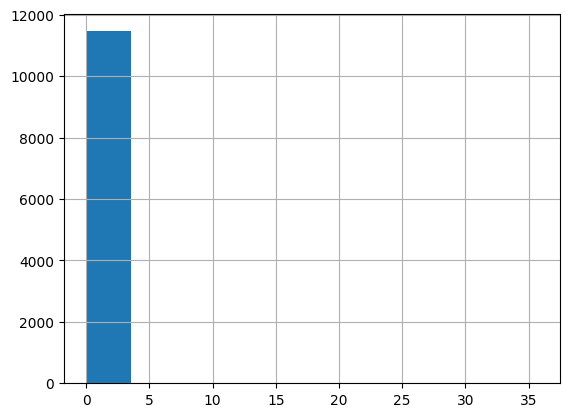

In [55]:
users.reply_count_mean.hist()
plt.show()

In [56]:
users.reply_count_mean.describe()

count    11508.000000
mean         0.064383
std          0.774574
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.666667
Name: reply_count_mean, dtype: float64

In [57]:
users.reply_count_mean.median()

0.0

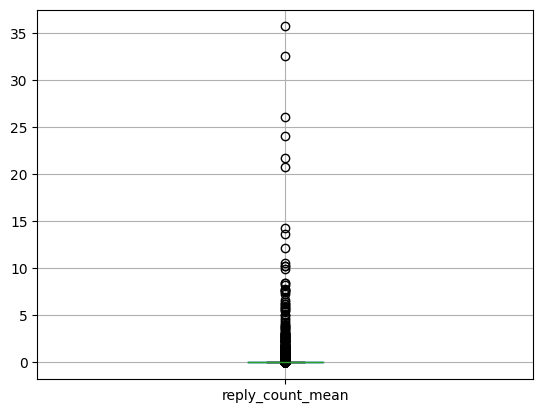

In [58]:
pd.DataFrame(users.reply_count_mean).boxplot()
plt.show()

<AxesSubplot: >

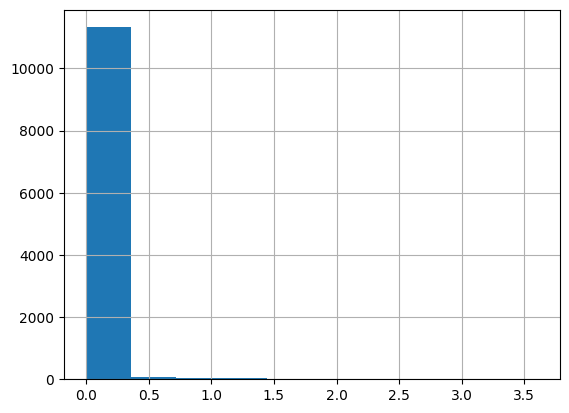

In [59]:
log_feature = pd.Series(np.log(users.reply_count_mean + 1))
log_feature.hist()

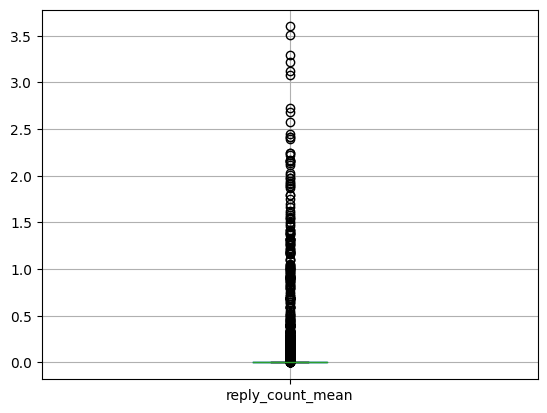

In [60]:
pd.DataFrame(log_feature).boxplot()
plt.show()

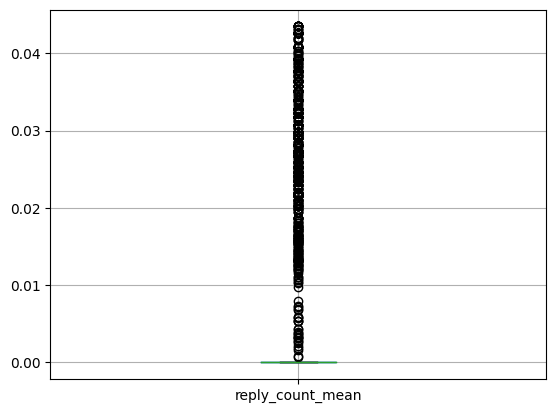

In [61]:
remove_outliers(log_feature, 0.0, 0.90)

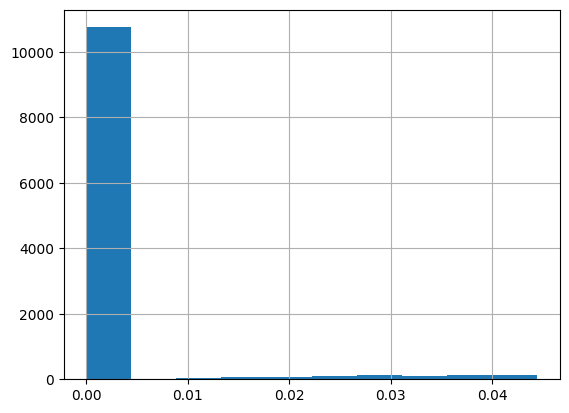

In [62]:
users.reply_count_mean = pd.Series(np.exp(log_feature) - 1)
users.reply_count_mean.hist()
plt.show()

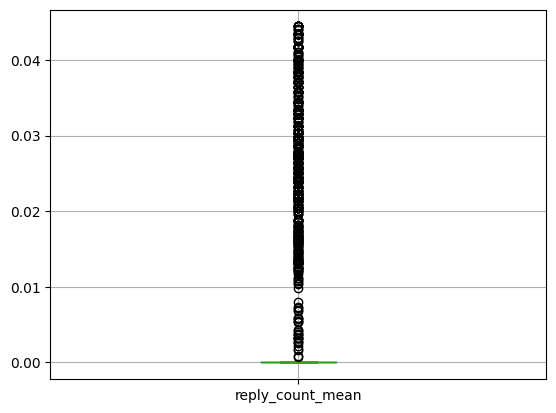

In [63]:
pd.DataFrame(users.reply_count_mean).boxplot()
plt.show()

### reply_count_std

In [64]:
users.reply_count_std.value_counts()

0.000000     9596
0.192308       41
0.195959       38
0.203931       38
0.217945       38
             ... 
0.557875        1
0.354043        1
12.727843       1
0.341868        1
3.567308        1
Name: reply_count_std, Length: 834, dtype: int64

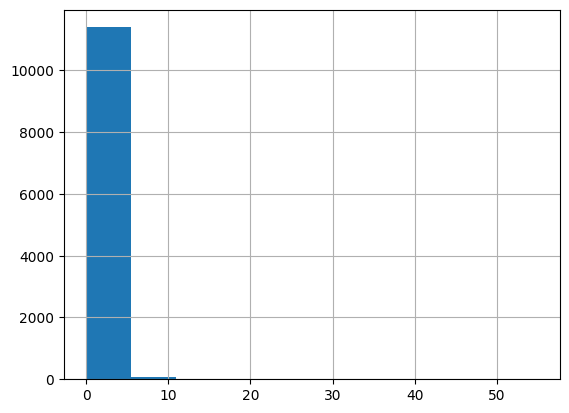

In [65]:
users.reply_count_std.hist()
plt.show()

In [66]:
users.reply_count_std.describe()

count    11508.000000
mean         0.207831
std          1.671863
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         54.899340
Name: reply_count_std, dtype: float64

In [67]:
users.reply_count_std.median()

0.0

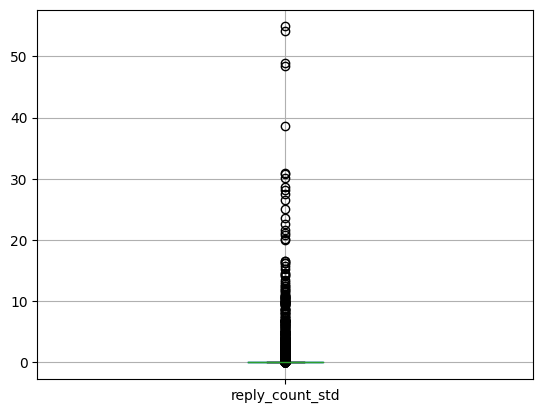

In [68]:
pd.DataFrame(users.reply_count_std).boxplot()
plt.show()

<AxesSubplot: >

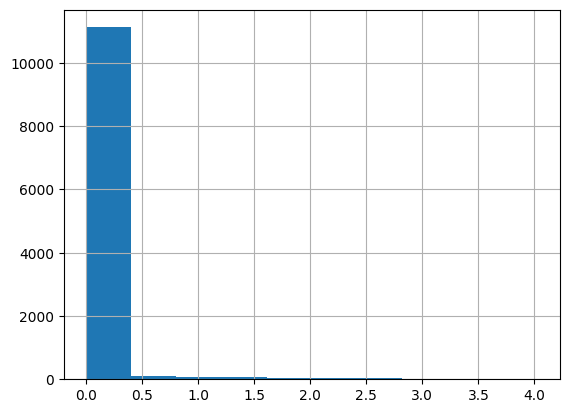

In [69]:
log_feature = pd.Series(np.log(users.reply_count_std + 1))
log_feature.hist()

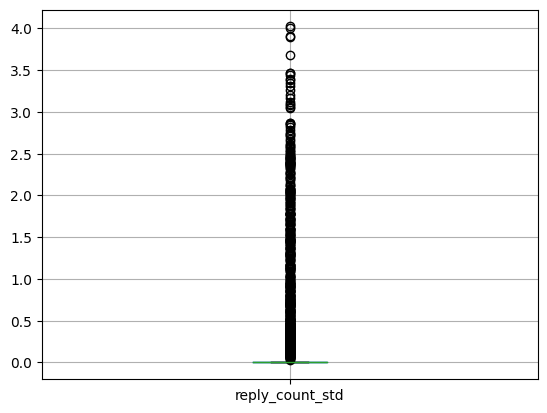

In [70]:
pd.DataFrame(log_feature).boxplot()
plt.show()

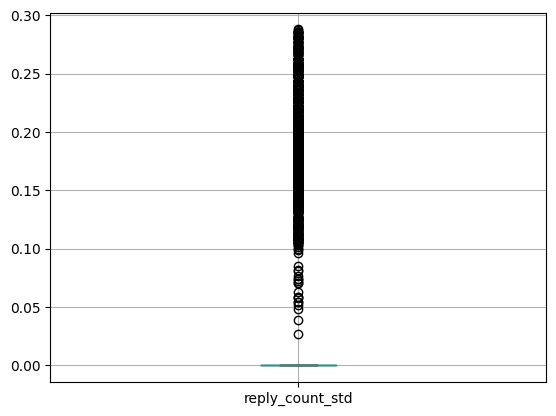

In [71]:
remove_outliers(log_feature, 0.0, 0.95)

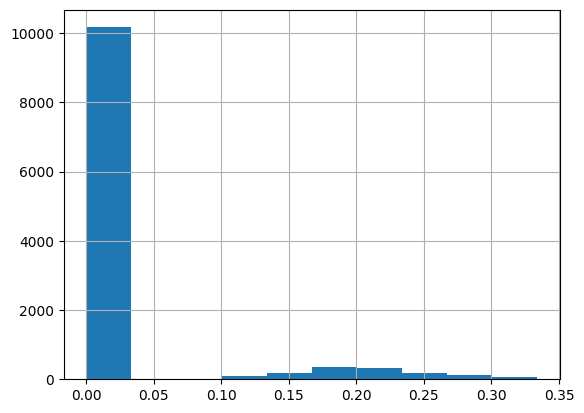

In [72]:
users.reply_count_std = pd.Series(np.exp(log_feature) - 1)
users.reply_count_std.hist()
plt.show()

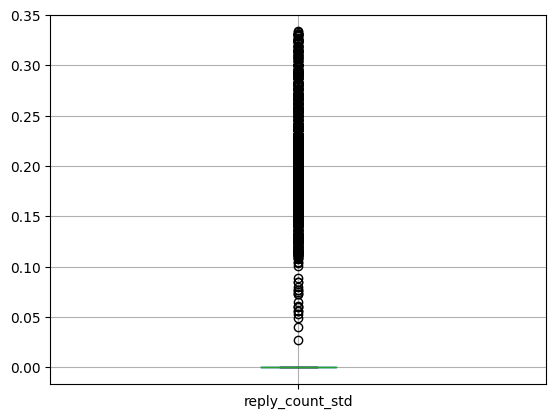

In [73]:
pd.DataFrame(users.reply_count_std).boxplot()
plt.show()

### reply_count_entropy

In [74]:
users.reply_count_entropy.value_counts()

-0.000000    9596
 0.276195      53
 0.266765      47
 0.235193      44
 0.258019      44
             ... 
 0.358157       1
 0.214682       1
 0.005817       1
 0.294615       1
 0.004596       1
Name: reply_count_entropy, Length: 676, dtype: int64

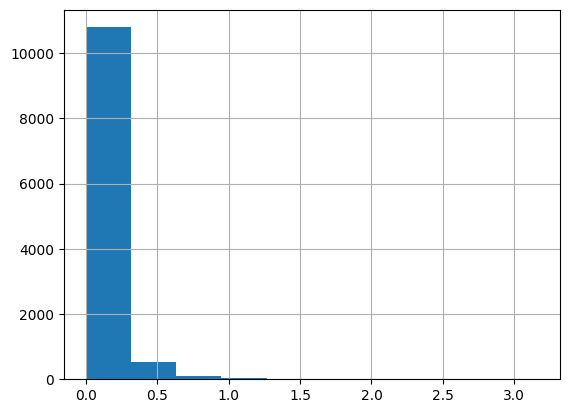

In [75]:
users.reply_count_entropy.hist()
plt.show()

In [76]:
users.reply_count_entropy.describe()

count    11508.000000
mean         0.059362
std          0.187638
min         -0.000000
25%         -0.000000
50%         -0.000000
75%          0.000000
max          3.160814
Name: reply_count_entropy, dtype: float64

In [77]:
users.reply_count_entropy.median()

0.0

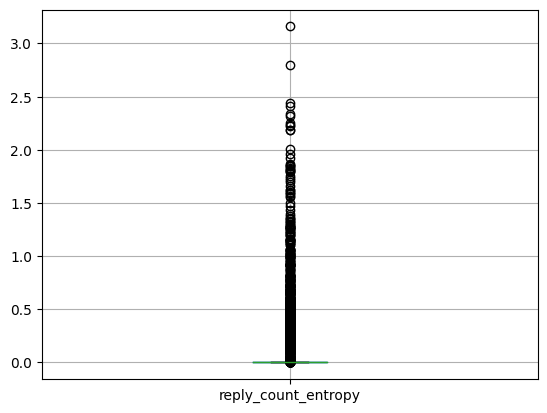

In [78]:
pd.DataFrame(users.reply_count_entropy).boxplot()
plt.show()

<AxesSubplot: >

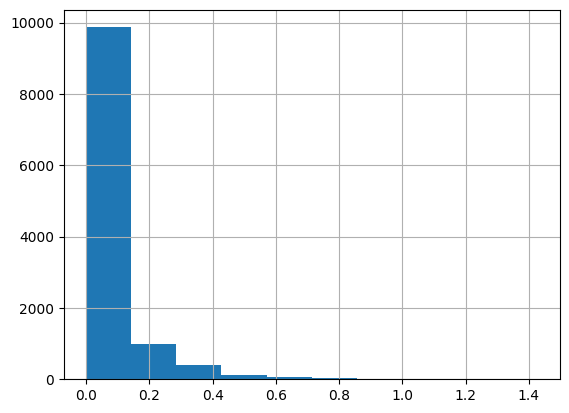

In [79]:
log_feature = pd.Series(np.log(users.reply_count_entropy + 1))
log_feature.hist()

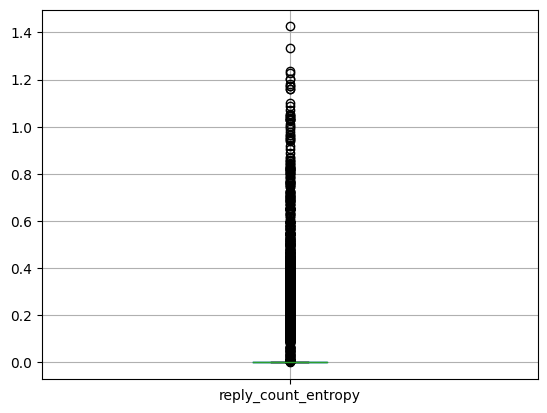

In [80]:
pd.DataFrame(log_feature).boxplot()
plt.show()

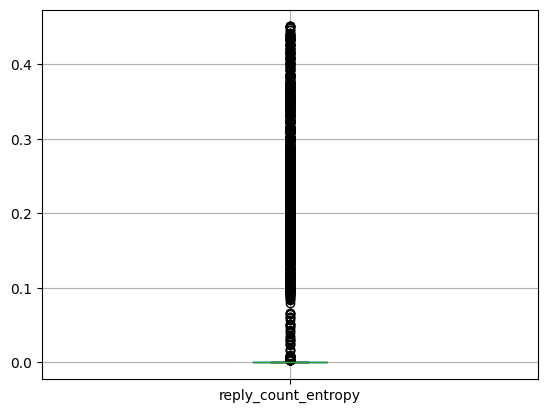

In [81]:
remove_outliers(log_feature, 0.0, 0.98)

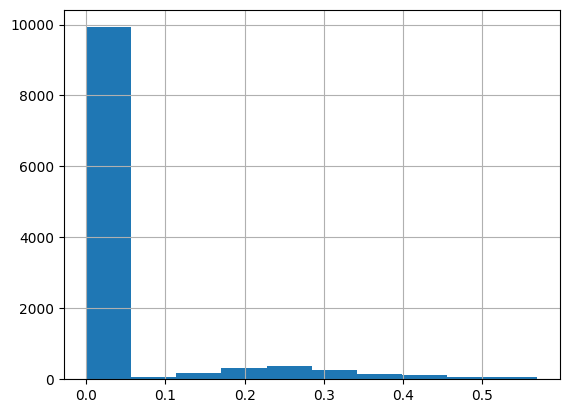

In [82]:
users.reply_count_entropy = pd.Series(np.exp(log_feature) - 1)
users.reply_count_entropy.hist()
plt.show()

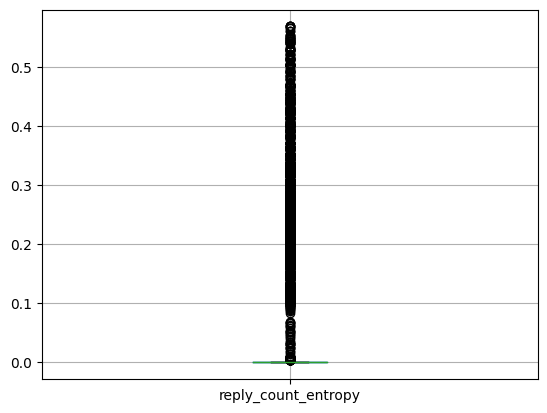

In [83]:
pd.DataFrame(users.reply_count_entropy).boxplot()
plt.show()

### favorite_count_mean

In [84]:
users.favorite_count_mean.value_counts()

0.000000    1995
0.037037      49
0.055556      48
0.052632      47
0.050000      46
            ... 
0.005844       1
0.188445       1
0.012382       1
0.132149       1
0.118160       1
Name: favorite_count_mean, Length: 5769, dtype: int64

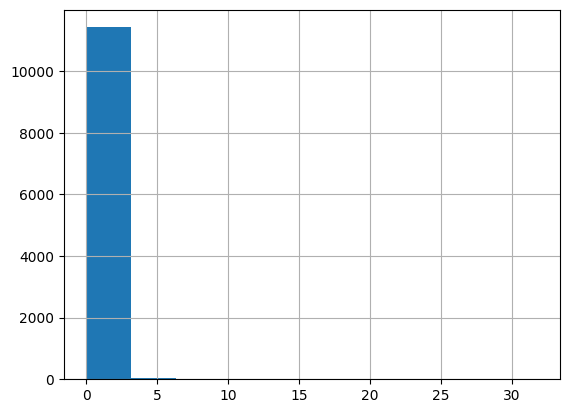

In [85]:
users.favorite_count_mean.hist()
plt.show()

In [86]:
users.favorite_count_mean.describe()

count    11508.000000
mean         0.242881
std          0.804714
min          0.000000
25%          0.017751
50%          0.052632
75%          0.180490
max         31.752999
Name: favorite_count_mean, dtype: float64

In [87]:
users.favorite_count_mean.median()

0.0526315789473684

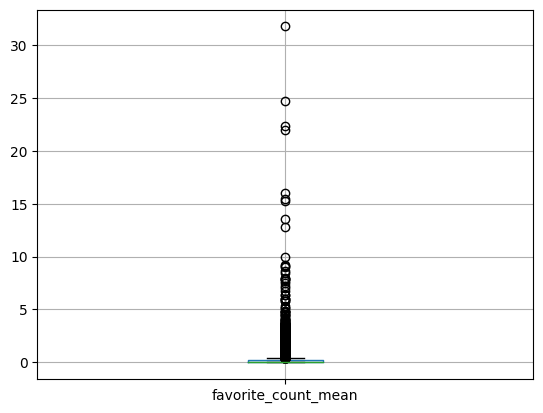

In [88]:
pd.DataFrame(users.favorite_count_mean).boxplot()
plt.show()

<AxesSubplot: >

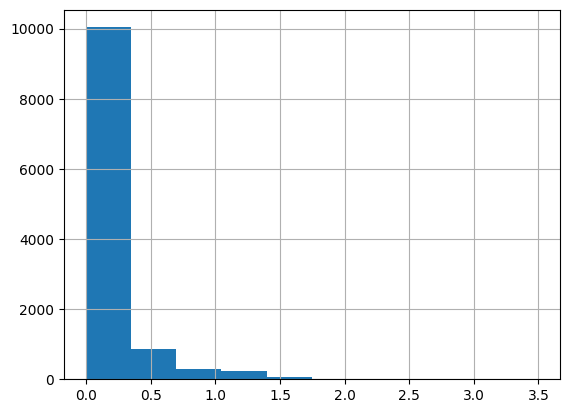

In [89]:
log_feature = pd.Series(np.log(users.favorite_count_mean + 1))
log_feature.hist()

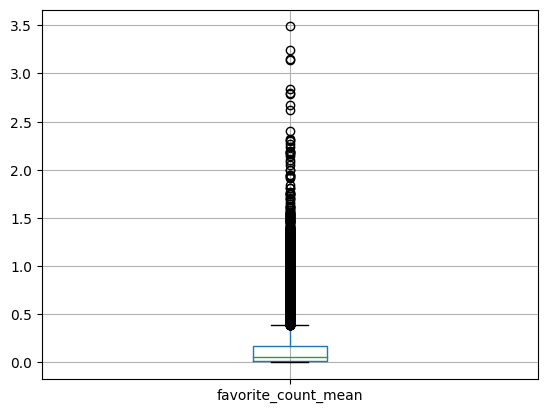

In [90]:
pd.DataFrame(log_feature).boxplot()
plt.show()

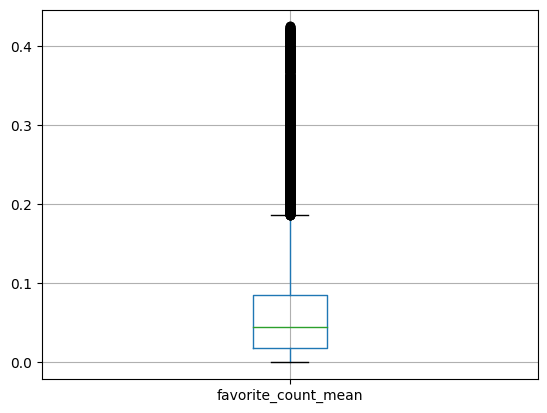

In [91]:
remove_outliers(log_feature, 0.0, 0.90)

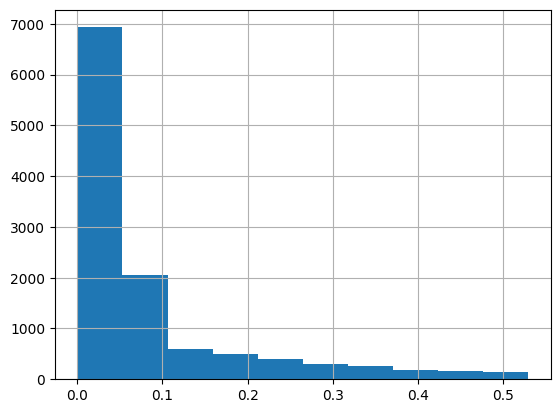

In [92]:
users.favorite_count_mean = pd.Series(np.exp(log_feature) - 1)
users.favorite_count_mean.hist()
plt.show()

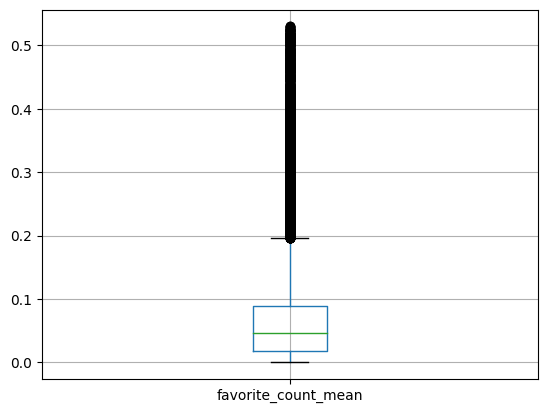

In [93]:
pd.DataFrame(users.favorite_count_mean).boxplot()
plt.show()

### favorite_count_std

In [94]:
users.favorite_count_std.value_counts()

0.000000    2005
0.188853      44
0.173993      39
0.192308      37
0.203931      36
            ... 
0.294026       1
0.128190       1
0.269486       1
0.180956       1
0.381551       1
Name: favorite_count_std, Length: 6777, dtype: int64

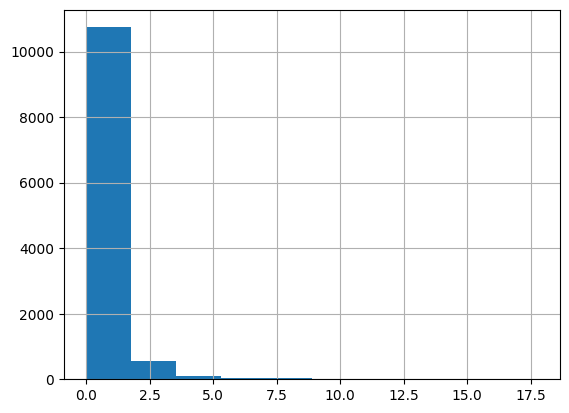

In [95]:
users.favorite_count_std.hist()
plt.show()

In [96]:
users.favorite_count_std.describe()

count    11508.000000
mean         0.554330
std          1.041633
min          0.000000
25%          0.136692
50%          0.240501
75%          0.570995
max         17.745109
Name: favorite_count_std, dtype: float64

In [97]:
users.favorite_count_std.median()

0.2405011652824552

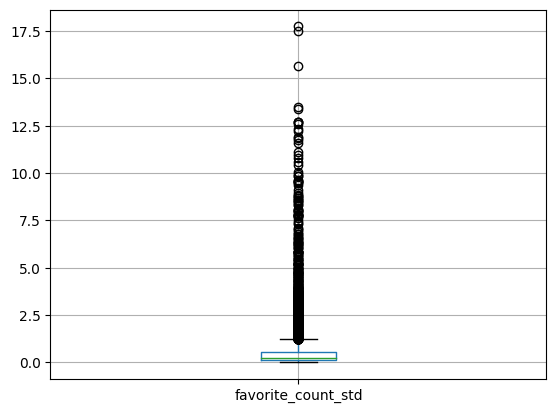

In [98]:
pd.DataFrame(users.favorite_count_std).boxplot()
plt.show()

<AxesSubplot: >

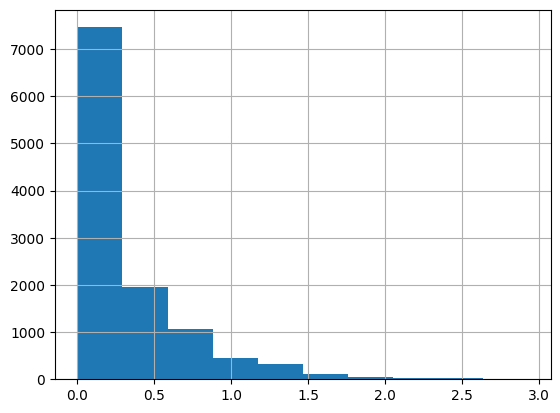

In [99]:
log_feature = pd.Series(np.log(users.favorite_count_std + 1))
log_feature.hist()

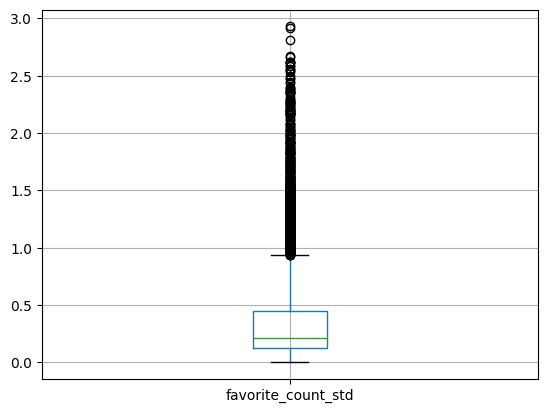

In [100]:
pd.DataFrame(log_feature).boxplot()
plt.show()

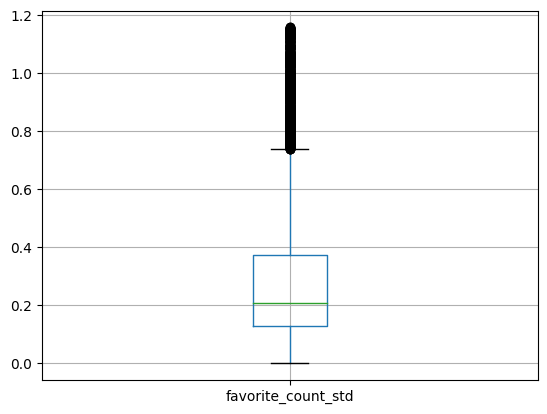

In [101]:
remove_outliers(log_feature, 0.0, 0.95)

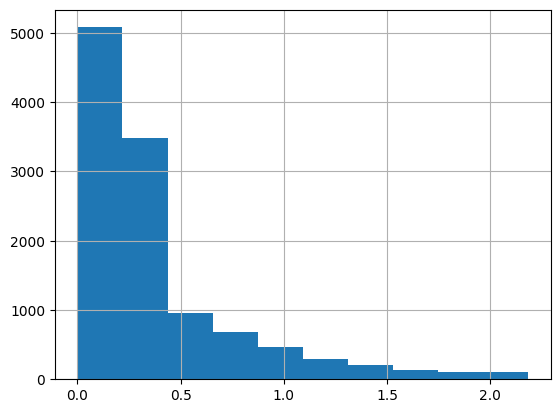

In [102]:
users.favorite_count_std = pd.Series(np.exp(log_feature) - 1)
users.favorite_count_std.hist()
plt.show()

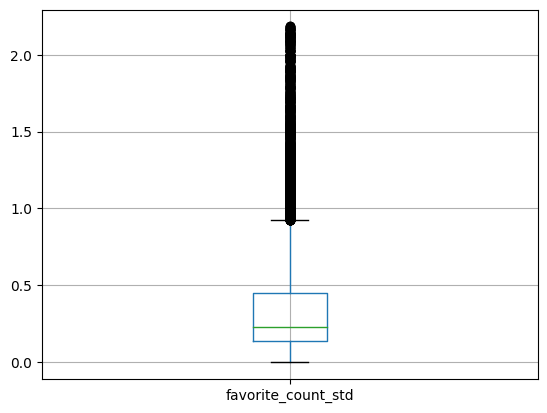

In [103]:
pd.DataFrame(users.favorite_count_std).boxplot()
plt.show()

### favorite_count_entropy

In [104]:
users.favorite_count_entropy.value_counts()

-0.000000    2005
 0.228538      50
 0.200622      43
 0.216397      42
 0.235193      41
             ... 
 1.596024       1
 1.251698       1
 1.781238       1
 0.094242       1
 0.541522       1
Name: favorite_count_entropy, Length: 6389, dtype: int64

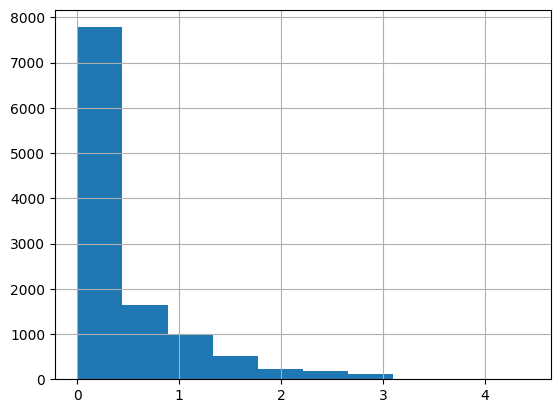

In [105]:
users.favorite_count_entropy.hist()
plt.show()

In [106]:
users.favorite_count_entropy.describe()

count    11508.000000
mean         0.489494
std          0.586681
min         -0.000000
25%          0.119116
50%          0.284334
75%          0.649710
max          4.424627
Name: favorite_count_entropy, dtype: float64

In [107]:
users.favorite_count_entropy.median()

0.2843337540767086

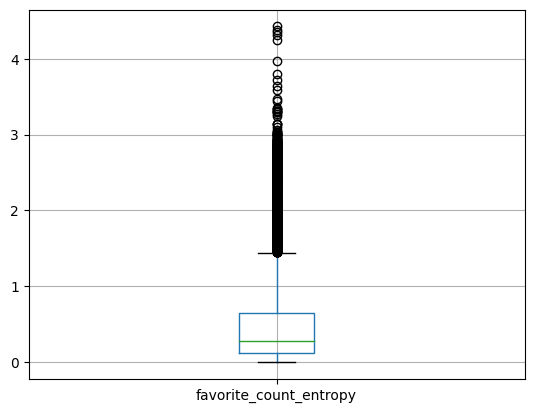

In [108]:
pd.DataFrame(users.favorite_count_entropy).boxplot()
plt.show()

<AxesSubplot: >

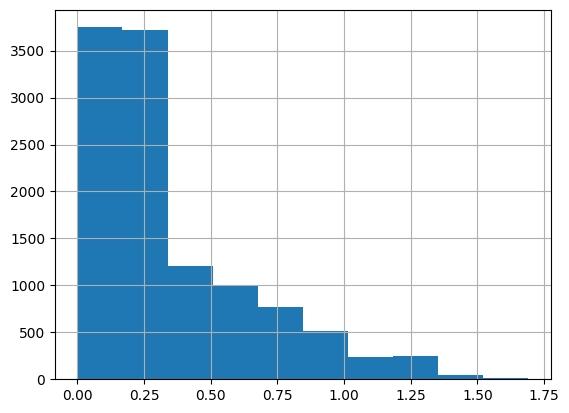

In [109]:
log_feature = pd.Series(np.log(users.favorite_count_entropy + 1))
log_feature.hist()

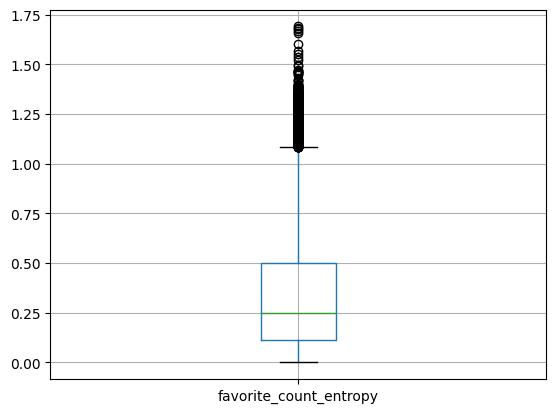

In [110]:
pd.DataFrame(log_feature).boxplot()
plt.show()

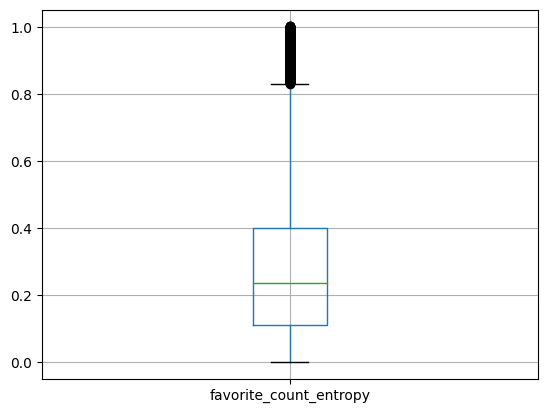

In [111]:
remove_outliers(log_feature, 0.0, 0.95)

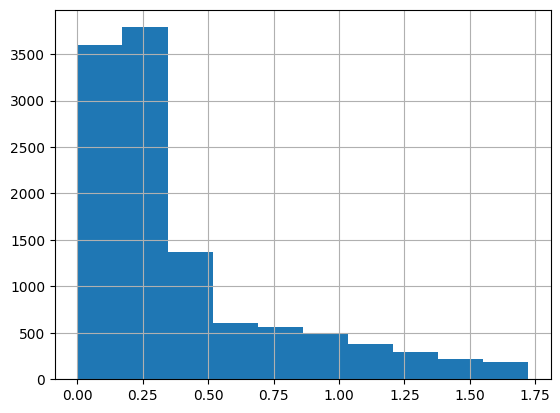

In [112]:
users.favorite_count_entropy = pd.Series(np.exp(log_feature) - 1)
users.favorite_count_entropy.hist()
plt.show()

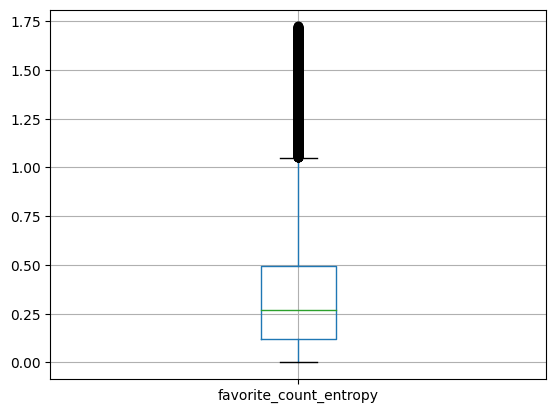

In [113]:
pd.DataFrame(users.favorite_count_entropy).boxplot()
plt.show()

### retweet_count_mean

In [114]:
users.retweet_count_mean.value_counts()

0.000000      1713
0.027778        33
0.043478        33
0.040000        32
0.050000        32
              ... 
34.117506        1
248.552448       1
97.910714        1
146.120180       1
334.418459       1
Name: retweet_count_mean, Length: 6711, dtype: int64

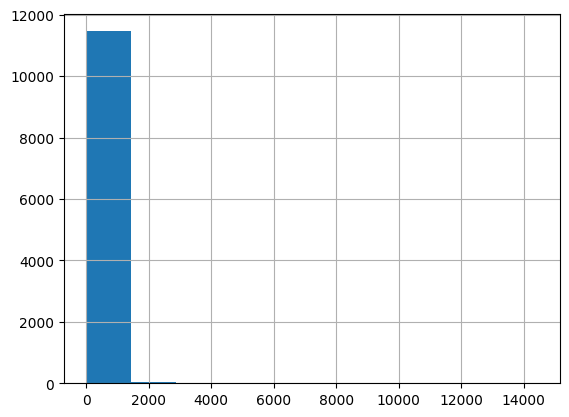

In [115]:
users.retweet_count_mean.hist()
plt.show()

In [116]:
users.retweet_count_mean.describe()

count    11508.000000
mean        98.347409
std        329.248000
min          0.000000
25%          0.022901
50%          0.096931
75%         74.499524
max      14432.000000
Name: retweet_count_mean, dtype: float64

In [117]:
users.retweet_count_mean.median()

0.09693078609458189

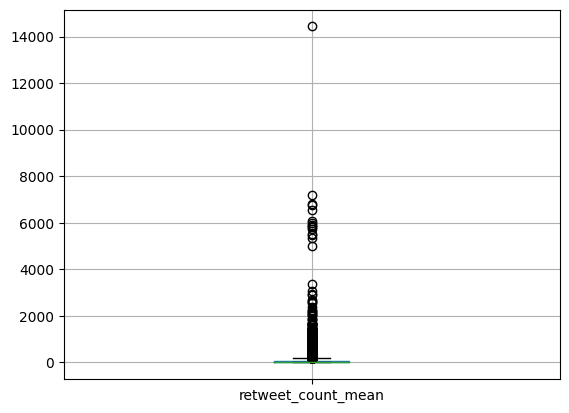

In [118]:
pd.DataFrame(users.retweet_count_mean).boxplot()
plt.show()

<AxesSubplot: >

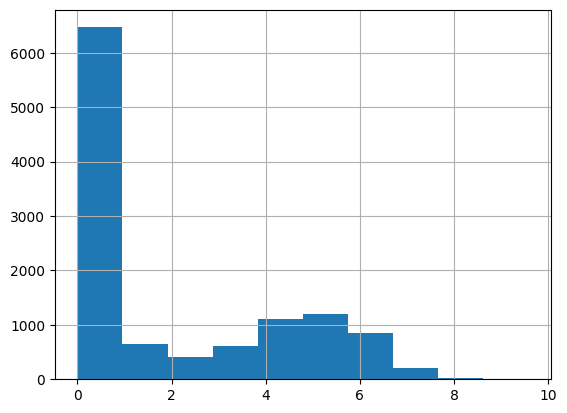

In [119]:
log_feature = pd.Series(np.log(users.retweet_count_mean + 1))
log_feature.hist()

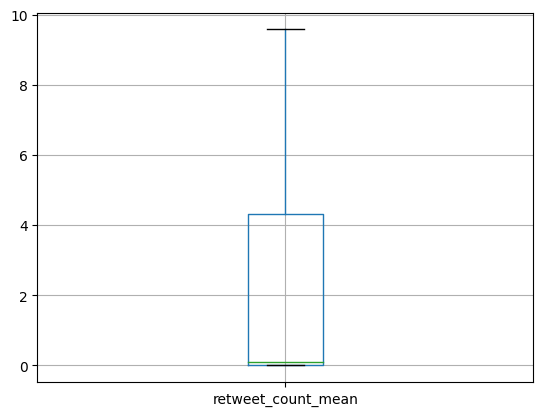

In [120]:
pd.DataFrame(log_feature).boxplot()
plt.show()

### retweet_count_std

In [124]:
users.retweet_count_std.value_counts()

0.000000       1724
0.199826         30
0.203931         29
0.173993         28
0.164336         28
               ... 
606.889556        1
1180.269050       1
974.623614        1
804.749125        1
1400.586883       1
Name: retweet_count_std, Length: 7353, dtype: int64

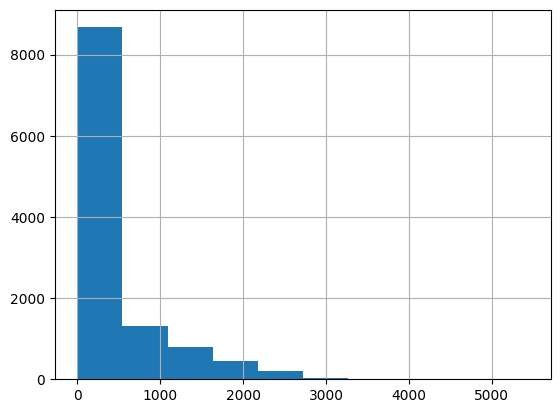

In [125]:
users.retweet_count_std.hist()
plt.show()

In [126]:
users.retweet_count_std.describe()

count    11508.000000
mean       361.956697
std        626.207734
min          0.000000
25%          0.151796
50%          0.437106
75%        533.013057
max       5442.443396
Name: retweet_count_std, dtype: float64

In [127]:
users.retweet_count_std.median()

0.43710629187919214

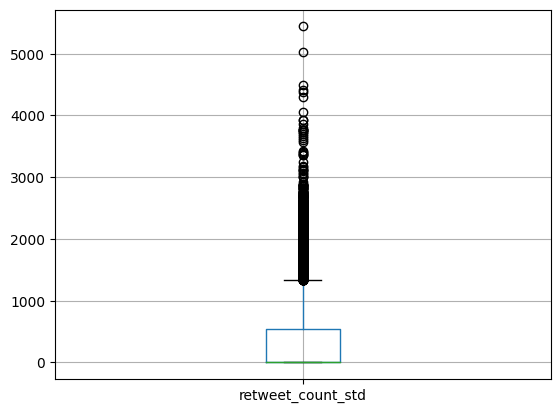

In [128]:
pd.DataFrame(users.retweet_count_std).boxplot()
plt.show()

<AxesSubplot: >

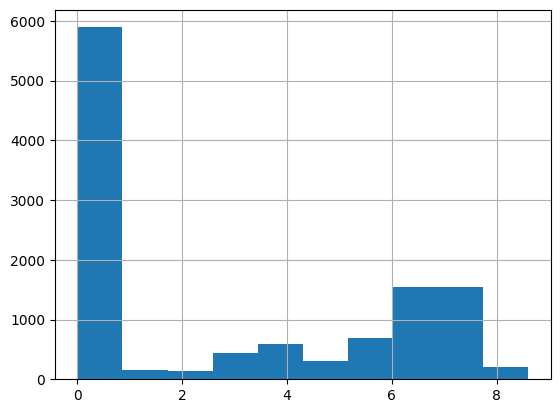

In [129]:
log_feature = pd.Series(np.log(users.retweet_count_std + 1))
log_feature.hist()

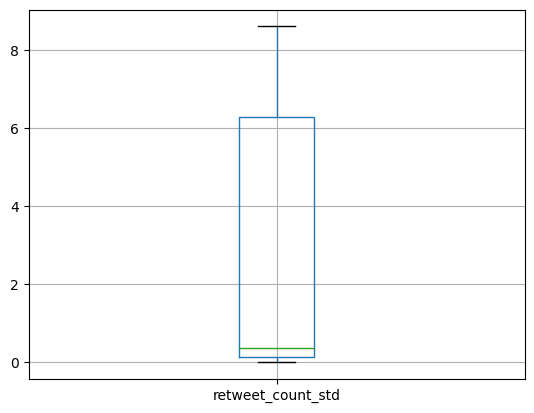

In [130]:
pd.DataFrame(log_feature).boxplot()
plt.show()

### retweet_count_entropy

In [131]:
users.retweet_count_entropy.value_counts()

-0.000000    1724
 0.249882      46
 0.258019      43
 0.242292      37
 0.286397      37
             ... 
 6.192340       1
 0.141404       1
 1.525038       1
 1.773516       1
 4.096404       1
Name: retweet_count_entropy, Length: 6545, dtype: int64

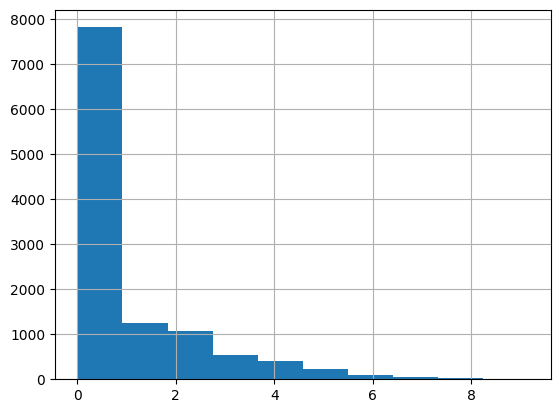

In [132]:
users.retweet_count_entropy.hist()
plt.show()

In [133]:
users.retweet_count_entropy.describe()

count    11508.000000
mean         1.011612
std          1.412183
min         -0.000000
25%          0.136059
50%          0.312150
75%          1.462435
max          9.161105
Name: retweet_count_entropy, dtype: float64

In [134]:
users.retweet_count_entropy.median()

0.312150449143044

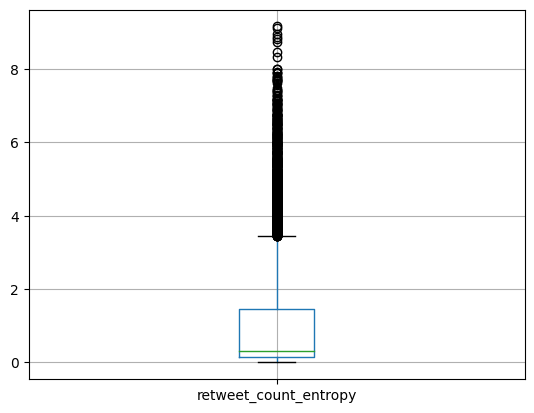

In [135]:
pd.DataFrame(users.retweet_count_entropy).boxplot()
plt.show()

<AxesSubplot: >

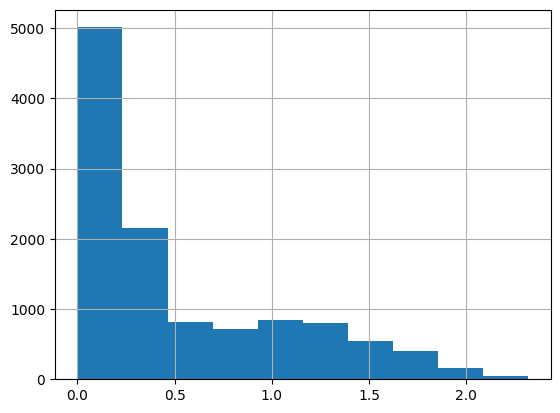

In [136]:
log_feature = pd.Series(np.log(users.retweet_count_entropy + 1))
log_feature.hist()

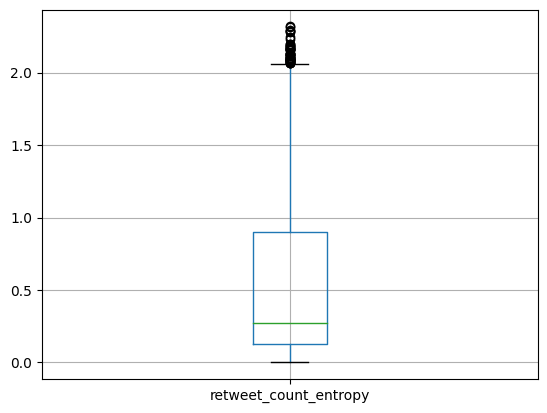

In [137]:
pd.DataFrame(log_feature).boxplot()
plt.show()

### Saving profiling

In [138]:
users.to_csv("cleaned_user_profiles_with_corr.csv")

## Correlation

We will check if the created (and cleaned) features are correlated, and in case we will remove the ones with high correlation (>= 0.8)

In [139]:
users.corr()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,retweet_count_entropy
bot,1.000000,-0.293386,0.126591,0.140359,-0.322305,-0.523658,-0.171584,0.079697,0.121745,0.127626,-0.259246,-0.273963,-0.307953,-0.174400,-0.394792,-0.452574
statuses_count,-0.293386,1.000000,-0.040725,-0.058953,0.221543,0.335084,0.052727,-0.055908,-0.090911,-0.099569,0.199672,0.240557,0.228379,0.063922,0.194892,0.308941
avg_length,0.126591,-0.040725,1.000000,0.779780,0.143874,0.006864,0.123339,-0.095862,-0.121249,-0.103846,0.070225,0.089339,0.063928,-0.066437,-0.131335,0.109798
avg_special_chars,0.140359,-0.058953,0.779780,1.000000,0.108603,-0.089229,0.102678,-0.043800,-0.048765,-0.038890,0.023206,0.040271,-0.000172,-0.083865,-0.150231,0.028043
urls_ratio,-0.322305,0.221543,0.143874,0.108603,1.000000,0.406666,0.315400,-0.031935,-0.042723,-0.025554,0.238530,0.243818,0.251279,0.219626,0.421601,0.453177
mentions_ratio,-0.523658,0.335084,0.006864,-0.089229,0.406666,1.000000,0.161371,-0.213171,-0.294857,-0.276052,0.356173,0.392153,0.435503,0.301072,0.456607,0.673600
hashtags_ratio,-0.171584,0.052727,0.123339,0.102678,0.315400,0.161371,1.000000,0.154536,0.212070,0.223992,0.039408,0.035885,0.004280,0.103228,0.238134,0.204666
reply_count_mean,0.079697,-0.055908,-0.095862,-0.043800,-0.031935,-0.213171,0.154536,1.000000,0.549497,0.387799,-0.116558,-0.119056,-0.167291,-0.008692,0.008937,-0.135191
reply_count_std,0.121745,-0.090911,-0.121249,-0.048765,-0.042723,-0.294857,0.212070,0.549497,1.000000,0.811016,-0.173733,-0.182229,-0.248922,-0.017664,-0.006567,-0.199695
reply_count_entropy,0.127626,-0.099569,-0.103846,-0.038890,-0.025554,-0.276052,0.223992,0.387799,0.811016,1.000000,-0.162885,-0.174800,-0.247925,0.030450,0.029368,-0.186047


In [140]:
mat_corr = users.corr()

# Identifies correlated variables
for i in range(16):
    for j in range(i):
        if abs(mat_corr.iat[i, j]) > 0.8:
            print(mat_corr.columns[i], " - ", mat_corr.columns[j], " - ", mat_corr.iat[i, j])
            

reply_count_entropy  -  reply_count_std  -  0.8110157493311603


In [141]:
# Removes a correlated feature 
del users["reply_count_entropy"]

## Saving cleaned dataset

In [142]:
users.to_csv("cleaned_user_profiles.csv")